---
title: "9.1"
format: 
  html:
    theme: lux
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/ha_1.csv')
print(df.columns)

# Prepare the data
X = df[['age', 'chol']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('logreg', LogisticRegression())  # Logistic regression
])

# Fit the pipeline
pipeline.fit(X, y)

pipeline.named_steps['logreg'].coef_


Index(['Name', 'age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalach',
       'diagnosis'],
      dtype='object')


array([[0.04686331, 0.00180124]])

In [2]:
pipeline.named_steps['logreg'].intercept_

array([-3.24011226])

In [3]:
(np.log(9) + 3.24011226 - .04686331 * 55) / .00180124

1587.7144563390887

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Prepare the data
X = df[['age', 'chol']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('LinDA', LinearDiscriminantAnalysis())
])

# Fit the pipeline
pipeline.fit(X, y)

pipeline.named_steps['LinDA'].coef_

array([[0.04655744, 0.00178967]])

In [5]:
pipeline.named_steps['LinDA'].intercept_

array([-3.21967766])

In [6]:
(3.21967766 - 0.04655744 * 55) / 0.00178967

368.2346242603385

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
from sklearn.svm import SVC
# Prepare the data
X = df[['age', 'chol']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('SVC', SVC(kernel='linear'))  # Specify 'linear' kernel
])

# Fit the pipeline
pipeline.fit(X, y)

pipeline.named_steps['SVC'].coef_

array([[0.06439772, 0.00365896]])

In [8]:
pipeline.named_steps['SVC'].intercept_

array([-4.68603406])

In [9]:
(4.68603406 - 0.06439772 * 55) / 0.00365896

312.70072916894406

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

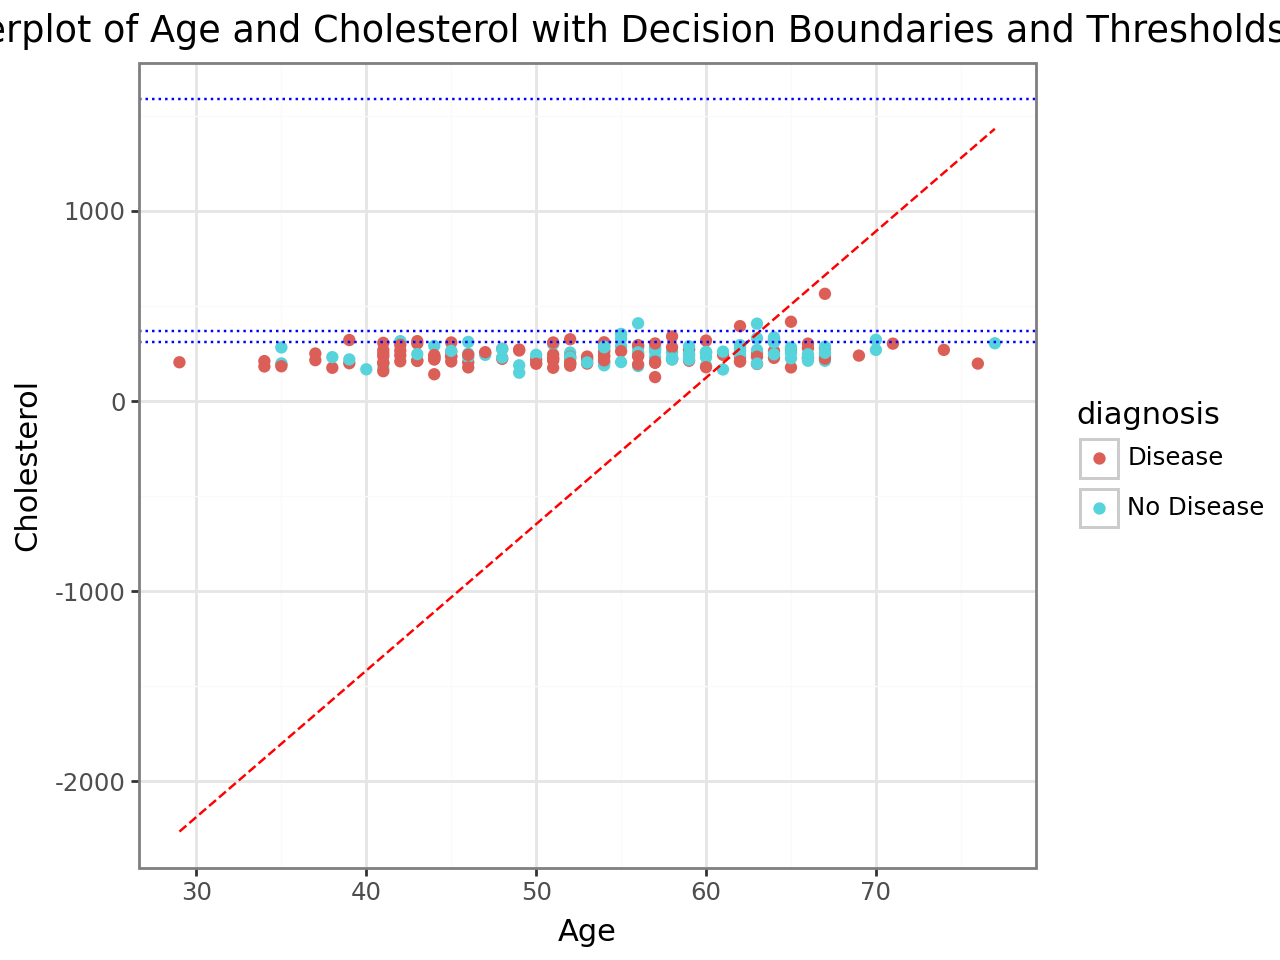

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from plotnine import *

# Prepare the data (ensure df is defined)
X = df[['age', 'chol']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a pipeline with logistic regression
pipeline = Pipeline([
    ('logreg', LogisticRegression()),
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Function to calculate y for a given x using model coefficients and intercept
def get_y_from_x(x, coef, intercept):
    return (-intercept - coef[0][0] * x) / coef[0][1]

# Create a range of x values for plotting the decision boundary line
x_range = np.linspace(df['age'].min(), df['age'].max(), 100)

# Calculate the y values for the decision boundary
y_logreg = get_y_from_x(x_range, pipeline.named_steps['logreg'].coef_, pipeline.named_steps['logreg'].intercept_)

# Create a new dataframe for the decision boundary line
boundary_df = pd.DataFrame({'age': x_range, 'chol': y_logreg})

# Create the scatterplot
(ggplot(df, aes(x='age', y='chol', color='diagnosis')) +
 geom_point() +
 geom_line(boundary_df, aes(x='age', y='chol'), color='red', linetype='dashed') +  # Decision boundary
 geom_hline(yintercept=[312, 368, 1587], color='blue', linetype='dotted') +  # Horizontal lines
 labs(title='Scatterplot of Age and Cholesterol with Decision Boundaries and Thresholds',
      x='Age',
      y='Cholesterol') +
 theme_bw())
